<a href="https://colab.research.google.com/github/carlos-souza-blip/Gasoline-price-2019-Brazil/blob/master/Prace_Comb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise Exploratória da Série Histórica dos Combustíveis no Território Brasileiro ###

# Inserido o Banco de Dados para análise #
Primeiro executamos as bibliotecas de impotância, e em seguida isserimos a base dados.

In [ ]:
# Importando Bibliotecas
import pandas as pd
import seaborn as srn
import plotly.graph_objects as go
import plotly.offline as py
import datetime

### Dataset - Dados dos Combustiveis do Território brasileiro

In [ ]:
  # Abringo Arquivo CSV
df10 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2019-10-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df11 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2019-11-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df12 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2019-12-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df1 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-01-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df2 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-02-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df3 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-03-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df4 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-04-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df5 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-05-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df6 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-06-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df7 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-07-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')
df8 = pd.read_csv("https://raw.githubusercontent.com/carlos-souza-blip/Gasoline-price-2019-Brazil/master/2020-08-gasolina-etanol.csv", engine='python', delimiter='\t', encoding='utf-16')

In [ ]:
# Concatenando os Arquivos
dataset = pd.concat([df10, df11, df12, df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
dataset

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,CO,DF,BRASILIA,AUTO POSTO 306 NORTE LTDA,22398818000147,ETANOL,03/10/2019,3.199,NaN,R$ / litro,RAIZEN
1,CO,DF,BRASILIA,AUTO POSTO CHAVES LTDA,746278000102,ETANOL,03/10/2019,3.199,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,CO,DF,BRASILIA,AUTO POSTO CRIOLO LTDA,27169700000160,ETANOL,03/10/2019,3.199,NaN,R$ / litro,RAIZEN
3,CO,DF,BRASILIA,AUTO POSTO EIXINHO LTDA,5470808000156,ETANOL,03/10/2019,3.199,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,AUTO POSTO ESQUINA LIMITADA,2551867000160,ETANOL,03/10/2019,3.159,2.9176,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...
509829,SE,SP,VOTUPORANGA,AUTO POSTO SO NATA LTDA,58075623000103,GASOLINA,17/08/2020,"4,199",NaN,R$ / litro,RAIZEN
509830,SE,SP,VOTUPORANGA,AUTO POSTO TREVAO DE VOTUPORANGA LTDA,2704352000153,GASOLINA,17/08/2020,"3,969",NaN,R$ / litro,BRANCA
509831,SE,SP,VOTUPORANGA,AUTO POSTO VOTU LTDA.,4491553000145,GASOLINA,17/08/2020,"4,18",NaN,R$ / litro,IPIRANGA
509832,SE,SP,VOTUPORANGA,VILAR & CIA LTDA,2748591000105,GASOLINA,17/08/2020,"4,19",NaN,R$ / litro,BRANCA


# *Limpeza dos dados* #
Como de custume alteramos a virgula pelo ponto, no qual a linguagem de programação de identifica.

Removeremos tais colunas onde não tem muita significancia para análise.

Alterar o modelo das datas e verificamos se há dados faltantes.


In [ ]:
# Verificando possíveis NA's
dataset.isnull().sum()

Região - Sigla            0
Estado - Sigla            0
Município                 0
Revenda                   0
CNPJ da Revenda           0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      362156
Unidade de Medida         0
Bandeira                  0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509834 entries, 0 to 509833
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Região - Sigla     509834 non-null  object
 1   Estado - Sigla     509834 non-null  object
 2   Município          509834 non-null  object
 3   Revenda            509834 non-null  object
 4   CNPJ da Revenda    509834 non-null  int64 
 5   Produto            509834 non-null  object
 6   Data da Coleta     509834 non-null  object
 7   Valor de Venda     509834 non-null  object
 8   Valor de Compra    147678 non-null  object
 9   Unidade de Medida  509834 non-null  object
 10  Bandeira           509834 non-null  object
dtypes: int64(1), object(10)
memory usage: 42.8+ MB


In [ ]:
# Mudando a vírgula pelo ponto nos valor de venda
dataset["Valor de Venda"] = dataset["Valor de Venda"].astype(str).str.replace(',','.')

# Alterando os nomes das colunas
dataset.columns = ["Regiao", "Estado", "Municipio", "Revenda", "CNPJ", "Produto", "Data", "Preco", "Compra", "Unidade", "Bandeira"]

# Alterando o formato das datas
dataset['Data'] = pd.to_datetime(dataset['Data'], errors='coerce', format="%d/%m/%Y")

# Transformando objeto coluna (Preço) em float
dataset['Preco'] = dataset.Preco.astype(float)

In [ ]:
# Removendo as colunas Revenda, CNPJ, Valor de Compra e Unidade de Medida
dataset.drop('Revenda', inplace= True, axis= 1)
dataset.drop('CNPJ', inplace= True, axis= 1)
dataset.drop('Compra', inplace= True, axis= 1)
dataset.drop('Unidade', inplace= True, axis= 1)

In [ ]:
# Nova dataset alterado 
dataset.head(10)

,Regiao,Estado,Municipio,Produto,Data,Preco,Bandeira
0,CO,DF,BRASILIA,ETANOL,2019-10-03,3.199,RAIZEN
1,CO,DF,BRASILIA,ETANOL,2019-10-03,3.199,PETROBRAS DISTRIBUIDORA S.A.
2,CO,DF,BRASILIA,ETANOL,2019-10-03,3.199,RAIZEN
3,CO,DF,BRASILIA,ETANOL,2019-10-03,3.199,PETROBRAS DISTRIBUIDORA S.A.
4,CO,DF,BRASILIA,ETANOL,2019-10-03,3.159,BRANCA
5,CO,DF,BRASILIA,ETANOL,2019-10-03,3.047,BRANCA
6,CO,DF,BRASILIA,ETANOL,2019-10-03,3.199,BRANCA
7,CO,DF,BRASILIA,ETANOL,2019-10-03,3.199,PETROBRAS DISTRIBUIDORA S.A.
8,CO,DF,BRASILIA,ETANOL,2019-10-03,3.599,IPIRANGA
9,CO,DF,BRASILIA,ETANOL,2019-10-03,3.099,BRANCA


# Análise de Dados #

##Sumário##

1. **Região:** Demarca as 6 regiões brasileiras por Siglas: Norte, Nordeste, Centro-Oeste, Sudeste e Sul;

2. **Estado:** Separa todos os estados brasileiros por siglas;

3. **Município:** Determina todos os municípios do estado citado;

4. **Produto:** Combustíveis separados entre Etanol e Gasolina;

5. **Data da Coleta:** Expoe a data da coleta dos dados de cada revendedora;

6. **Valor de Venda:** Valor estabelecidos pela revenda, a fins lucrativos pra cada posto de combustível;

7. **Bandeira:** Marcas das fornecedoras.

### Frequência Relativa dos Estados em relação a quantidade de Produto ###

In [ ]:
# Explorando dados Categóricos
estado = dataset.Estado.value_counts(ascending = True) # A função size contabiliza a quantidade total de elementos repetidos
estado

RR       761
AP      1374
AC      2656
SE      3576
TO      3881
DF      4308
RO      4852
AL      5203
AM      5338
PI      5389
PB      5591
RN      5653
PA      7162
MS      7942
MA      8260
ES      8981
MT     14661
PE     17190
SC     19250
CE     19663
GO     21097
RS     24378
BA     31147
PR     34621
RJ     38503
MG     54133
SP    154264
Name: Estado, dtype: int64

***Gráfico - Coleta de Combustiveis por Estado (Gasolina e Etanol)***

In [ ]:
trace = go.Bar( x = estado,
                    y = estado.index,
                    orientation = 'h',
                    name = '',
                    marker = dict(color = 'rgba(176, 12, 230, 0.8)'),
                    text= "")

data = [trace]

layout = dict(title = 'Coleta de Combustiveis por Estado',
              xaxis= dict(title = 'Frequência Relativa', ticklen = 30, zeroline = False),
              yaxis= dict(title = 'Estados', ticklen=30, zeroline=False)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

### Distribuição de Combustiveis por Bandeiras ###
Distribuição acima de 800 

***Gráfico de Vendas de Combustiveis por Bandeiras***

In [ ]:
dist = dataset.Bandeira.value_counts(ascending = True).loc[lambda x : x>800]
trace = go.Bar(
                    x = dist,
                    y = dist.index,
                    orientation = 'h',
                    #mode = "markers+lines",
                    name = '',
                    marker = dict(color = 'rgba(30, 169, 143, 0.99)'),
                    text= "")

data = [trace]

layout = dict(title = 'Vendas de Combustíveis por Bandeiras',
              xaxis= dict(title = 'Bandeiras',ticklen = 30, zeroline = False),
              yaxis= dict(title = 'Frequência Relativa', ticklen=30, zeroline=False)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

### Separando os Produtos Etanol e Gasolina ###

In [ ]:
# Separando os Produtos Gasolina e Etanol
gasolina = dataset.loc[dataset['Produto']=='GASOLINA']
etanol = dataset.loc[dataset['Produto']=='ETANOL']

***Gráfico de Distribuição de Preços - Histrograma***

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



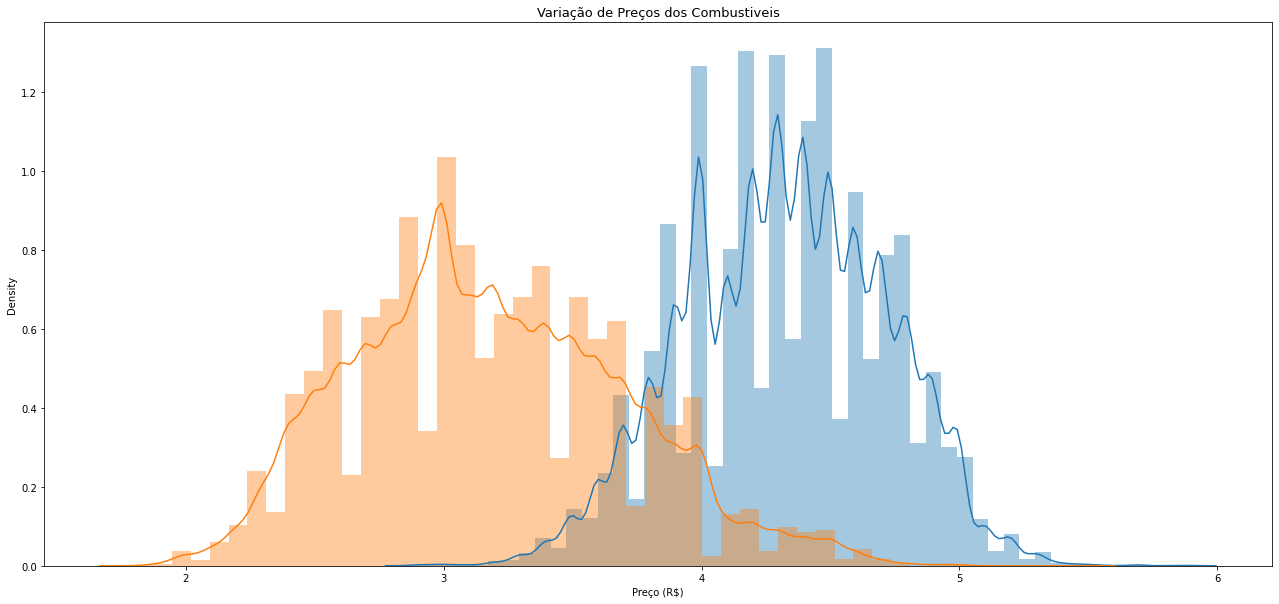

In [ ]:
ax = srn.distplot(gasolina['Preco'])
ax1 = srn.distplot(etanol['Preco'])
ax.figure.set_size_inches(22,10);
ax.set_title('Variação de Preços dos Combustiveis', fontsize=13)
ax.set_xlabel('Preço (R$)', fontsize=10)
data = [ax, ax1]
data

***Gráfico de Preços de Vendas decorrente aos dias***

Gasolina

In [ ]:
gas = gasolina.groupby('Data')['Preco'].agg(['mean'])
gas.columns = ["preco"]

trace = go.Scatter(x = gas.index,
                    y = gas.preco,
                    mode = "markers+lines",
                    name = "Preço da Gasolina",
                    marker = dict(color = 'blue'),
                    text= "Preço da Gasolina")
layout = dict(title = 'Média de Variação dos Preços da Gasolina (outubro de 2019 à agosto de 2020)',
              xaxis = dict(title = 'Data da Coleta',ticklen=30, zeroline= False))
fig = dict(data = trace, layout = layout)
py.iplot(fig)

Etanol

In [ ]:
eta = etanol.groupby('Data')['Preco'].agg(['mean'])
eta.columns = ["preco"]

trace = go.Scatter(x = eta.index,
                    y = eta.preco,
                    mode = "markers+lines",
                    name = "Preço do Etanol",
                    marker = dict(color = 'green'),
                    text= "Preço do Etanol")
layout = dict(title = 'Média de Variação dos Preços do Etanol (outubro de 2019 à agosto de 2020)',
              xaxis = dict(title = 'Data da Coleta',ticklen=30, zeroline= False))
fig = dict(data = trace, layout = layout)
py.iplot(fig)

### DataFrame - Separando a Bandeira BRANCA por Produto ###

-> Frequência relativa dos Estados por Produto, contendo somente a produtora **Branca**

In [ ]:
# Separando a bandeira Branca
branca = dataset[dataset['Bandeira'] == 'BRANCA']

# Separando os Produtos: Etanol e Gasolina, em relação a bandeira Branca
y = branca[branca['Produto'] == 'GASOLINA']
y1 = branca[branca['Produto'] == 'ETANOL']

# Fazendo a contagem entre os Estados por Produtos
x = y.groupby('Estado')['Produto'].agg(['count'])
x1 = y1.groupby('Estado')['Produto'].agg(['count'])

# Renomeando
x1.columns = ["Etanoll"]
x.columns = ["Gasolina"]

# Criando um Dataset
dfa = pd.DataFrame(data=x)
dfb = pd.DataFrame(data=x1)
dfa["Etanol"] = dfb.Etanoll
dfa.head(7)

,Gasolina,Etanol
Estado,,
AC,190,11
AL,723,717
AM,894,220
AP,428,34
BA,7012,7011
CE,2776,2424
DF,680,680


***Gráfico***

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=dfa.index,
    x=dfa.Etanol,
    name='Etanol',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=dfa.index,
    x=dfa.Gasolina,
    name='Gasolina',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.show()

### Separado a quatidade de Produto por data da Coleta ###

In [ ]:
# Fazendo a contagem das datas em relação ao produto
datas = y.groupby('Data')['Produto'].agg(['count'])
datas1 = y1.groupby('Data')['Produto'].agg(['count'])

# Renomear
datas.columns = ["Gasolina_"]
datas1.columns = ["Etanol_"]

# Transformando em Dataset e unindo os dados (datas, datas1)
df_a = pd.DataFrame(data = datas)
df_b = pd.DataFrame(data = datas1)
df_a["Etanol"] = df_b.Etanol_
df_a

,Gasolina_,Etanol
Data,,
2019-10-01,526,504
2019-10-02,711,670
2019-10-03,148,137
2019-10-07,406,358
2019-10-08,439,397
...,...,...
2020-08-10,394,352
2020-08-11,1064,1006
2020-08-12,531,469


***Gráfico da distribuição por data em relação quantidade total das distribuiçoes de combustiveis nesses dias***

In [ ]:
trace_oh = go.Scatter(x = df_a.index,
                    y = df_a.Gasolina_,
                    mode = "markers+lines",
                    name = "Vendas de Gasolina",
                    marker = dict(color = 'red'),
                    text= "Vendas de Gasolina")

trace_one = go.Scatter(x = df_a.index,
                    y = df_a.Etanol,
                    mode = "markers+lines",
                    name = "Vendas de Etanol",
                    marker = dict(color = 'blue'),
                    text= "Preço da Gasolina")
data = [trace_oh, trace_one]

layout = dict(title = 'Venda de Combustiveis (outubro de 2019 à agosto de 2020)',
              xaxis = dict(title = 'Data da Coleta',ticklen=30, zeroline= False))
fig = dict(data = data, layout = layout)
py.iplot(fig)